## Imports

In [1]:
import gym
from IPython.display import clear_output

import numpy as np
import time
import matplotlib.pyplot as plt
import random

## Load Taxi-v3

In [2]:
env = gym.make('Taxi-v3')

## Monte Carlo (Every-Visit, On-policy)

### Hyperparamters

In [19]:
alpha = 0.1 # Incremental Mean
gamma = 0.6 # Discount
epsilon = 0.1 # E-Greedy
max_episodes = int(1e5)

### Run
1. E-Greedy Selection: Can you verify it?  
I realised that it is very similar to Q-learning.

2. Incremental Mean is used instead

In [20]:
%%time
#q_table = np.zeros([env.observation_space.n, env.action_space.n])
#acc_rewards = []
for i in range(1, max_episodes + 1):
    state = env.reset()
    done = False
    states = []
    actions = []
    rewards = []
    while not done:
        if random.random() < epsilon: action = env.action_space.sample()
        else:                         action = np.argmax(q_table[state])
        next_state, reward, done, info = env.step(action)
        states.append(state)
        actions.append(action)
        rewards.append(reward)
        state = next_state
#         clear_output(wait=True)
#         print('Episode:', i)
#         env.render()
    goal = 0
    for state, action, reward in zip(states[::-1], actions[::-1], rewards[::-1]):
        goal = gamma * goal + reward
        old_value = q_table[state, action]
        new_value = (1 - alpha) * old_value + alpha * goal
        q_table[state, action] = new_value
    acc_rewards.append(sum(rewards))

CPU times: user 6min 10s, sys: 62.5 ms, total: 6min 10s
Wall time: 6min 10s


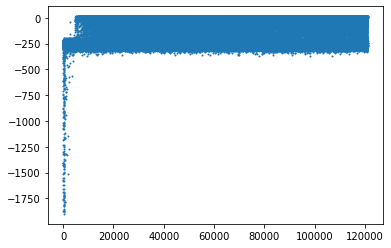

Mean -179.67785123966942


In [21]:
plt.scatter(range(len(acc_rewards)), acc_rewards, s=1)
plt.show()
print('Mean', np.mean(acc_rewards))

### Result

In [39]:
env.reset()
acc_reward = 0
step = 0
done = False
while not done:
    action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action)
    
    acc_reward += reward
    step += 1
    clear_output(wait=True)
    env.render()
    print('Acc Reward:', acc_reward)
    print('Step', step)
    print('Done', done)
    time.sleep(0.01)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Acc Reward: 8
Step 13
Done True
